<a href="https://colab.research.google.com/github/Mparate1234/Py_stat_DS_ML/blob/main/Python_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sn

#    Read the Data from Yahoo finance website directly.

In [2]:
AMz_stock=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1647132732&period2=1678668732&interval=1d&events=history&includeAdjustedClose=true")
APL_stock=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1647160253&period2=1678696253&interval=1d&events=history&includeAdjustedClose=true")
GOGL_stock=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1647141004&period2=1678677004&interval=1d&events=history&includeAdjustedClose=true")
MSFT_stock=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1647141075&period2=1678677075&interval=1d&events=history&includeAdjustedClose=true")

#  Perform cleaning.

In [3]:
Amz_stocks=AMz_stock.drop("Adj Close",axis='columns')
Apl_stocks=APL_stock.drop("Adj Close",axis='columns')
Gogl_stocks=GOGL_stock.drop("Adj Close",axis='columns')
Msft_stocks=MSFT_stock.drop("Adj Close",axis='columns')


#       Change in stock price over time

In [4]:
import plotly.graph_objs as go
import pandas as pd


fig = go.Figure()
fig.add_trace(go.Scatter(x=Amz_stocks['Date'], y=Amz_stocks['Open'], name='Open'))
fig.add_trace(go.Scatter(x=Amz_stocks['Date'], y=Amz_stocks['High'], name='High'))
fig.add_trace(go.Scatter(x=Amz_stocks['Date'], y=Amz_stocks['Low'], name='Low'))
fig.add_trace(go.Scatter(x=Amz_stocks['Date'], y=Amz_stocks['Close'], name='Close'))

fig.layout = go.Layout(title='AMAZON Stock Price 21-22', xaxis=dict(title='Date'), yaxis=dict(title='Price'))

fig.show()


# Visualization of stock’s volume being traded

In [5]:
fig=px.line(Amz_stocks,x=Amz_stocks["Date"],y=Amz_stocks['Volume'],title="Volume of Amazon stock")
fig.show()

 #     Moving average prices of various stocks

In [6]:
mean1=Amz_stocks[["High","Low"]]
Amz_Average=mean1.mean(axis=1)
Amz_stocks['Amz_Average']=Amz_Average

mean2=Apl_stocks[["High","Low"]]
Apl_Average=mean2.mean(axis=1)
Apl_stocks["Apl_Average"]=Apl_Average

mean3=Gogl_stocks[["High","Low"]]
Gogl_Average=mean3.mean(axis=1)
Gogl_stocks["Gogl_Average"]=Gogl_Average

mean4=Msft_stocks[["High","Low"]]
Msft_Average=mean4.mean(axis=1)
Msft_stocks["Msft_Average"]=Msft_Average


In [7]:
import plotly.graph_objs as go
import pandas as pd


fig = go.Figure()
fig.add_trace(go.Scatter(x=Amz_stocks['Date'], y=Amz_stocks['Amz_Average'], name='Amz_price'))
fig.add_trace(go.Scatter(x=Apl_stocks['Date'], y=Apl_stocks['Apl_Average'], name='Apl_price'))
fig.add_trace(go.Scatter(x=Gogl_stocks['Date'], y=Gogl_stocks['Gogl_Average'], name='Gogl_price'))
fig.add_trace(go.Scatter(x=Msft_stocks['Date'], y=Msft_stocks['Msft_Average'], name='Msft_price'))

fig.layout = go.Layout(title='Average stock price of all stocks', xaxis=dict(title='Date'), yaxis=dict(title='Price'))

fig.show()

# Adda new column ‘Trend’ whose values are based on the 'Daily Return'


In [8]:
# calculated daily retun and added "Trend" column in dataframe

Amz_stocks['previous_Close'] = Amz_stocks['Close'].shift(1)
Amz_stocks['Amz_Trend'] = (Amz_stocks['Close'] / Amz_stocks['previous_Close']) - 1

Apl_stocks['previous_Close'] = Apl_stocks['Close'].shift(1)
Apl_stocks['Apl_Trend'] = (Apl_stocks['Close'] / Apl_stocks['previous_Close']) - 1

Gogl_stocks['previous_Close'] = Gogl_stocks['Close'].shift(1)
Gogl_stocks['Gogl_Trend'] = (Gogl_stocks['Close'] / Gogl_stocks['previous_Close']) - 1

Msft_stocks['previous_Close'] = Msft_stocks['Close'].shift(1)
Msft_stocks['Msft_Trend'] = (Msft_stocks['Close'] / Msft_stocks['previous_Close']) - 1


# example
Amz_stocks.head()

,Date,Open,High,Low,Close,Volume,Amz_Average,previous_Close,Amz_Trend
0,2022-03-14,145.981003,147.449997,140.884003,141.852997,74086000,144.167000,NaN,NaN
1,2022-03-15,142.850006,147.985001,142.000000,147.366501,75584000,144.992501,141.852997,0.038868
2,2022-03-16,148.500000,153.149994,147.353500,153.104004,84958000,150.251747,147.366501,0.038934
3,2022-03-17,152.640503,157.498505,152.139999,157.238998,72934000,154.819252,153.104004,0.027008
4,2022-03-18,156.813004,161.593994,156.011002,161.250504,102962000,158.802498,157.238998,0.025512


# Visualize trend frequency

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2,subplot_titles=("Amazon returns","Apple returns","Googsl returns","Microsoft returns"))

fig.add_trace(go.Scatter(x=Amz_stocks['Date'], y=Amz_stocks['Amz_Trend']),
              row=1, col=1)

fig.add_trace(go.Scatter(x=Apl_stocks['Date'], y=Apl_stocks['Apl_Trend']),
              row=1, col=2)

fig.add_trace(go.Scatter(x=Gogl_stocks['Date'], y=Gogl_stocks['Gogl_Trend']),
              row=2, col=1)

fig.add_trace(go.Scatter(x=Msft_stocks['Date'], y=Msft_stocks['Msft_Trend']),
              row=2, col=2)

fig.show()


#   Correlation between the daily returns of different stocks

In [10]:
data=pd.concat([Amz_stocks['Amz_Trend'],Apl_stocks['Apl_Trend'],Gogl_stocks['Gogl_Trend'],Msft_stocks['Msft_Trend']],axis=1)
data.dropna()


,Amz_Trend,Apl_Trend,Gogl_Trend,Msft_Trend
1,0.038868,0.029677,0.023035,0.038743
2,0.038934,0.029015,0.031081,0.025213
3,0.027008,0.006454,0.006807,0.002819
4,0.025512,0.020919,0.016352,0.017648
5,0.001495,0.008538,-0.002361,-0.004227
...,...,...,...,...
245,-0.012118,0.018539,0.016592,0.006189
246,-0.002133,-0.014496,-0.014752,-0.010589
247,0.003955,0.008377,0.005097,-0.001771
248,-0.017781,-0.014915,-0.021025,-0.005439


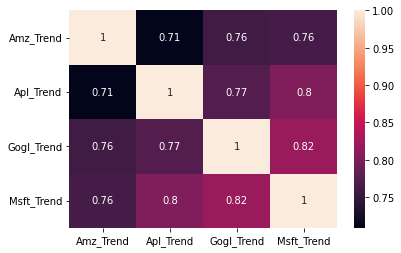

In [11]:

corr_matrix=data.corr()
sn.heatmap(corr_matrix,annot=True)
plt.show()